In [1]:
import datetime as datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('default') # Make the graphs a bit prettier
plt.rcParams['figure.figsize'] = (15, 5)

In [111]:
educacion = pd.read_csv("C:\Users\gonza\Downloads\dtos\datos_navent_fiuba\\fiuba_1_postulantes_educacion.csv", low_memory=False)
genero_edad = pd.read_csv("C:\Users\gonza\Downloads\dtos\datos_navent_fiuba\\fiuba_2_postulantes_genero_y_edad.csv", low_memory=False)
visitas = pd.read_csv("C:\Users\gonza\Downloads\dtos\datos_navent_fiuba\\fiuba_3_vistas.csv", low_memory=False)
postulaciones = pd.read_csv("C:\Users\gonza\Downloads\dtos\datos_navent_fiuba\\fiuba_4_postulaciones.csv", low_memory=False)
avisos_online = pd.read_csv("C:\Users\gonza\Downloads\dtos\datos_navent_fiuba\\fiuba_5_avisos_online.csv", low_memory=False)
avisos_detalles = pd.read_csv("C:\Users\gonza\Downloads\dtos\datos_navent_fiuba\\fiuba_6_avisos_detalle.csv", low_memory=False)

In [112]:
educacion.shape

(298231, 3)

In [113]:
educacion = educacion[pd.notnull(educacion['nombre'])]
educacion = educacion[pd.notnull(educacion['estado'])]
educacion['elmeme'] = educacion.apply(lambda x: type(x[1]))
#educacion['valido'] = educacion.apply(lambda x: isinstance(x[1], str) and isinstance(x[2], str))
#educacion['edu_completa'] = educacion.apply(lambda x: x[1] + ' ' + x[2])
#educacion.groupby('valido').count()
educacion.head()

,idpostulante,nombre,estado,elmeme
0,NdJl,Posgrado,En Curso,NaN
1,8BkL,Universitario,En Curso,NaN
2,1d2B,Universitario,En Curso,NaN
3,NPBx,Universitario,En Curso,NaN
4,NPBx,Master,En Curso,NaN


In [4]:
genero_edad.head(1)

,idpostulante,fechanacimiento,sexo
0,NM5M,1970-12-03,FEM


In [5]:
visitas.head(1)

,idAviso,timestamp,idpostulante
0,1111780242,2018-02-23T13:38:13.187-0500,YjVJQ6Z


In [6]:
postulaciones.head(1)

,idaviso,idpostulante,fechapostulacion
0,1112257047,NM5M,2018-01-15 16:22:34


In [7]:
avisos_online.head(1)
#no aporta nada, solo tiene ids

,idaviso
0,1112355872


In [8]:
#las columnas ciudad y mapacalle tienen demasiados NaN como para aportar alguna infromacion relevante
avisos_detalles.drop('ciudad', axis = 1, inplace = True)
avisos_detalles.drop('mapacalle', axis = 1, inplace = True)
avisos_detalles.head(1)

,idaviso,idpais,titulo,descripcion,nombre_zona,tipo_de_trabajo,nivel_laboral,nombre_area,denominacion_empresa
0,8725750,1,VENDEDOR/A PROVINCIA DE SANTA FE,<p><strong><strong>Empresa:</strong></strong> ...,Gran Buenos Aires,Full-time,Senior / Semi-Senior,Comercial,VENTOR


In [9]:
#los df que tienen la info del postulante (sin relacion con el aviso)
edu_gen_edad = pd.merge(educacion, genero_edad, on = 'idpostulante', how = 'inner')
edu_gen_edad.head(1)

,idpostulante,nombre,estado,fechanacimiento,sexo
0,NdJl,Posgrado,En Curso,1969-05-09,MASC


In [10]:
info_final = pd.merge(edu_gen_edad, visitas, on = 'idpostulante', how = 'inner')
info_final = pd.merge(info_final, postulaciones, on = 'idpostulante', how = 'inner')
#info_final = pd.merge(info_final, avisos_detalles, on = 'idpostulante', how = 'inner')
info_final.head()

,idpostulante,nombre,estado,fechanacimiento,sexo,idAviso,timestamp,idaviso,fechapostulacion
0,NdJl,Posgrado,En Curso,1969-05-09,MASC,1112352879,2018-02-26T16:01:12.795-0500,1112261212,2018-01-16 08:50:30
1,NdJl,Posgrado,En Curso,1969-05-09,MASC,1112352879,2018-02-26T16:01:12.795-0500,1112273308,2018-01-23 07:53:47
2,NdJl,Posgrado,En Curso,1969-05-09,MASC,1112352879,2018-02-26T16:01:12.795-0500,1112281548,2018-01-24 05:10:12
3,NdJl,Posgrado,En Curso,1969-05-09,MASC,1112352879,2018-02-26T16:01:12.795-0500,1112260409,2018-01-24 05:17:29
4,NdJl,Posgrado,En Curso,1969-05-09,MASC,1112352879,2018-02-26T16:01:12.795-0500,1112293547,2018-01-29 15:41:43


In [11]:
info_final.drop('idAviso', axis = 1, inplace = True)
#info_final.drop('idpostulante', axis = 1, inplace = True)

In [12]:
#info_final_gente = pd.merge(info_final, avisos_detalles, on = 'idaviso', how = 'left')
#info_final_avisos = pd.merge(avisos_detalles, info_final, on = 'idaviso', how = 'left')
info_final.head(1)

,idpostulante,nombre,estado,fechanacimiento,sexo,idAviso,timestamp,fechapostulacion
0,NdJl,Posgrado,En Curso,1969-05-09,MASC,1112352879,2018-02-26T16:01:12.795-0500,2018-01-16 08:50:30


In [13]:
avisos_detalles.head(1)

,idaviso,idpais,titulo,descripcion,nombre_zona,tipo_de_trabajo,nivel_laboral,nombre_area,denominacion_empresa
0,8725750,1,VENDEDOR/A PROVINCIA DE SANTA FE,<p><strong><strong>Empresa:</strong></strong> ...,Gran Buenos Aires,Full-time,Senior / Semi-Senior,Comercial,VENTOR


In [22]:
meme = info_final.groupby('idpostulante').idAviso.count()
meme.head

<bound method Series.head of idpostulante
0z5VvGv      102
0zB026d       36
0zB03O9     1530
0zB0YGv     2754
0zB0xL1        8
0zB11wr        1
0zB16Dr      255
0zB1Bev      133
0zB1XB1     1248
0zB1YOY      288
0zB1oA1      483
0zB2Nva     5676
0zB2VOa       60
0zB2Xza        4
0zB2pbr       54
0zB2qQ9      352
0zB2zpr        2
0zB3NPd      176
0zB3Nz9    40680
0zB3QQr       30
0zB3laq      840
0zB3zRa       10
0zB4EoY      550
0zB4Lbd     3534
0zB4dN9        4
0zB4jvq       16
0zB4wYr      342
0zB4xvv     2550
0zB5M9v       30
0zB5VQr       96
           ...  
zvxq2rJ      882
zvxqJ9m       36
zvxqa1D        4
zvxr0P3        8
zvxr18K      264
zvxrAzJ      368
zvxrKzD      256
zvxrQbb      273
zvxrrj3     1155
zvxrwZb      144
zvxv3m3       72
zvxv42D     2728
zvxv5vE       11
zvxv63m      116
zvxv8JJ      150
zvxvApE       96
zvxvo6J       16
zvxvoJ3      576
zvxvr1D        5
zvxwAlJ       12
zvxwNr6       32
zvxwar6       99
zvxxKwb      420
zvxxaE8      782
zvxxj2E        1
zvxz5r

In [27]:
avisos_detalles.groupby('idpais').count() #son todos del mismo pais

,idaviso,titulo,descripcion,nombre_zona,tipo_de_trabajo,nivel_laboral,nombre_area,denominacion_empresa
idpais,,,,,,,,
1,13534,13534,13534,13534,13534,13534,13534,13529


In [40]:
info_final['chicos'] = info_final['fechanacimiento'].apply(lambda x: x.split('-')[0]<2000 if isinstance(x, str) else True)

In [44]:
info_final.groupby('chicos').count()

,idpostulante,nombre,estado,fechanacimiento,sexo,idAviso,timestamp,fechapostulacion
chicos,,,,,,,,
False,58151430,58151430,58151430,58151430,58151430,58151430,58151430,58151430
True,375408,375408,375408,0,375408,375408,375408,375408


In [116]:
avisos_detalles['nombre_zona'] = avisos_detalles['nombre_zona'].apply(lambda x: 'Gran Buenos Aires' if x == 'GBA Oeste' else x)


,idaviso,idpais,titulo,descripcion,ciudad,mapacalle,tipo_de_trabajo,nivel_laboral,nombre_area,denominacion_empresa
nombre_zona,,,,,,,,,,
Buenos Aires (fuera de GBA),2,2,2,2,0,0,2,2,2,2
Capital Federal,876,876,876,876,4,871,876,876,876,876
Gran Buenos Aires,12656,12656,12656,12656,43,1,12656,12656,12656,12651


In [51]:
info_final.groupby('estado').count()

,idpostulante,nombre,fechanacimiento,sexo,idAviso,timestamp,fechapostulacion,chicos
estado,,,,,,,,
Abandonado,4862290,4862290,4823275,4862290,4862290,4862290,4862290,4862290
En Curso,15764063,15764063,15648313,15764063,15764063,15764063,15764063,15764063
Graduado,37900485,37900485,37679842,37900485,37900485,37900485,37900485,37900485


In [46]:
menes_postulados = pd.merge(educacion, postulaciones, on = 'idpostulante', how = 'inner' )

In [47]:
menes_postulados = pd.merge(menes_postulados, avisos_detalles, on = 'idaviso', how = 'inner')

In [49]:
menes_postulados.head(1)

,idpostulante,nombre,estado,idaviso,fechapostulacion,idpais,titulo,descripcion,nombre_zona,tipo_de_trabajo,nivel_laboral,nombre_area,denominacion_empresa
0,NdJl,Posgrado,En Curso,1112261212,2018-01-16 08:50:30,1,Jóvenes Profesionales - Responsable Administra...,<p>Nos encontramos en la búsqueda de un<strong...,Gran Buenos Aires,Full-time,Jefe / Supervisor / Responsable,Administración,EDUCADO EN ARGENTINA


In [ ]:
#gente con mejores estudios busca mas alto nivel
menes_postulados.groupby()

In [114]:
avisos_detalles.head()

,idaviso,idpais,titulo,descripcion,nombre_zona,ciudad,mapacalle,tipo_de_trabajo,nivel_laboral,nombre_area,denominacion_empresa
0,8725750,1,VENDEDOR/A PROVINCIA DE SANTA FE,<p><strong><strong>Empresa:</strong></strong> ...,Gran Buenos Aires,NaN,NaN,Full-time,Senior / Semi-Senior,Comercial,VENTOR
1,17903700,1,Enfermeras,<p>Solicitamos para importante cadena de farma...,Gran Buenos Aires,NaN,NaN,Full-time,Senior / Semi-Senior,Salud,Farmacias Central Oeste
2,1000150677,1,Chofer de taxi,<p>TE GUSTA MANEJAR? QUERES GANAR PLATA HACIEN...,Capital Federal,NaN,Empedrado 2336,Full-time,Senior / Semi-Senior,Transporte,FAMITAX SRL
3,1000610287,1,CHOFER DE CAMIONETA BAHIA BLANCA - PUNTA ALTA,<p><strong>Somos una empresa multinacional que...,Gran Buenos Aires,NaN,NaN,Full-time,Senior / Semi-Senior,Transporte,Wurth Argentina S.A
4,1000872556,1,Operarios de Planta - Rubro Electrodomésticos,<p><strong>OPERARIOS DE PLANTA</strong></p><p>...,Gran Buenos Aires,NaN,NaN,Full-time,Senior / Semi-Senior,Producción,ELECTRO OUTLET SRL


In [123]:
#grafico de todas las estaciones del primer conjunto

#suponemos un criterio para poca, media y mucha cantidad de bicis disponibles

%matplotlib notebook

lat37 = station[station['lat'] < 37.37]

colors = ["" for x in range(lat37['promedio_bikes_available'].size)]
i = 0
for line in lat37['promedio_bikes_available']:
    if(int(line) < 3):
        colors[i] = 'red'
    elif((int(line) > 3) & (int(line) < 8)):
        colors[i] = 'orange'
    else:
        colors[i] = 'green'
    i = i +1
plt.scatter(lat37['lat'], lat37['long'], s=lat37['promedio_bikes_available']*20, c = colors )

plt.suptitle("Estaciones según el promedio de la cantidad de bicicletas disponibles (1er conjunto)")
plt.xlabel("Latitud")
plt.ylabel("Longitud")
plt.show()
#aregar q si son de un radio menor a x , sean de otro color. tres colores distintos. poco, medio y mucha disponibilidad

KeyError: "None of [['', 'Buenos Aires (fuera de GBA)', 'Capital Federal', 'Gran Buenos Aires']] are in the [columns]"

In [131]:
avisos_detalles.groupby('nombre_zona').count()

,idaviso,idpais,titulo,descripcion,ciudad,mapacalle,tipo_de_trabajo,nivel_laboral,nombre_area,denominacion_empresa,nivel_numerico
nombre_zona,,,,,,,,,,,
Buenos Aires (fuera de GBA),2,2,2,2,0,0,2,2,2,2,2
Capital Federal,876,876,876,876,4,871,876,876,876,876,876
Gran Buenos Aires,12656,12656,12656,12656,43,1,12656,12656,12656,12651,12656


In [133]:
avisos_detalles['nivel_numerico'] = avisos_detalles['nivel_laboral'].apply(lambda x: aEnum(x))
avisos_detalles['zona_numerica'] = avisos_detalles['nombre_zona'].apply(lambda x: aEnum(x))

avisos_detalles.tail()

,idaviso,idpais,titulo,descripcion,nombre_zona,ciudad,mapacalle,tipo_de_trabajo,nivel_laboral,nombre_area,denominacion_empresa,nivel_numerico,zona_numerica
13529,1112342505,1,Vendedor de Salon -- UNOMOTOS,<p>UNOMOTOS Concesionaria líder en el rubro de...,Gran Buenos Aires,NaN,NaN,Full-time,Senior / Semi-Senior,Ventas,UNOMOTOS,3,4
13530,1112342513,1,OPERADOR DE ENSAYOS NO DESTRUCTIVOS,<p><strong>RECONOCIDA EMPRESA DE MONTAJES INDU...,Gran Buenos Aires,NaN,NaN,Full-time,Senior / Semi-Senior,Ingeniería Oficina Técnica / Proyecto,Grupo Consultor,3,4
13531,1112342456,1,Back officer Junior de Fondos Comunes de Inver...,"<p>BNP Paribas Investment Partners, importante...",Gran Buenos Aires,NaN,NaN,Full-time,Junior,Contabilidad,BNP PARIBAS ARGENTINA INVESTMENT PARTNERS S A,2,4
13532,1112342496,1,Asistente Administrativo,"<p>Somos un joven grupo gastronómico, que se e...",Gran Buenos Aires,NaN,NaN,Full-time,Gerencia / Alta Gerencia / Dirección,Administración,Cerveteca Odin Srl,0,4
13533,1112342432,1,Ingeniero para coordinación de obras de canali...,<p>Importante empresa de servicios para obras ...,Gran Buenos Aires,NaN,NaN,Full-time,Jefe / Supervisor / Responsable,Construcción,CIMA S.A.,1,4


In [119]:
def aEnumNivel(nivel):
    if(nivel == 'Gerencia / Alta Gerencia / Dirección'):
        return 0
    if(nivel == 'Jefe / Supervisor / Responsable'):
        return 1
    if(nivel == 'Junior'):
        return 2
    if(nivel == 'Senior / Semi-Senior'):
        return 3
    return 4
    

In [132]:
def aEnumZona(zona):
    if(zona == 'Buenos Aires (fuera de GBA)'):
        return 0
    if(zona == 'Capital Federal'):
        return 1
    return 2
    

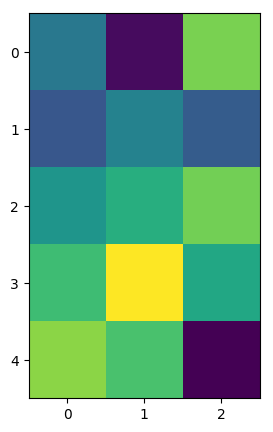

In [137]:
import numpy as np
import matplotlib.pyplot as plt

# Fixing random state for reproducibility
np.random.seed(40)

X = 10*np.random.rand(5, 3)

fig, ax = plt.subplots()
ax.imshow(X, interpolation='nearest')

numrows, numcols = X.shape

def format_coord(x, y):
    col = int(x + 0.5)
    row = int(y + 0.5)
    if col >= 0 and col < numcols and row >= 0 and row < numrows:
        z = X[row, col]
        return 'x=%1.4f, y=%1.4f, z=%1.4f' % (x, y, z)
    else:
        return 'x=%1.4f, y=%1.4f' % (x, y)

ax.format_coord = format_coord
plt.show()

In [135]:
X = 10*np.random.rand(5, 3)
X

array([[ 9.04267217,  4.49904851,  1.18924654],
       [ 8.35300176,  2.02248226,  1.74202671],
       [ 4.4914708 ,  6.69794781,  9.57399109],
       [ 8.33333251,  5.08309965,  6.30023548],
       [ 8.35034686,  4.47331645,  7.62290474]])